# Filtros

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [93]:
imgRuido = cv2.imread('./img/ruido.png', cv2.COLOR_BGR2GRAY)
imgRuido2 = cv2.imread('./img/ruido.jpg', cv2.COLOR_BGR2GRAY)

In [97]:
kernel = np.ones((5,5), np.float32)/25

In [98]:
dts1 = cv2.filter2D(imgRuido,-1,kernel)
blur1 = cv2.blur(imgRuido, (5,5))
dts2 = cv2.filter2D(imgRuido2,-1,kernel)
blur2 = cv2.blur(imgRuido2, (5,5))

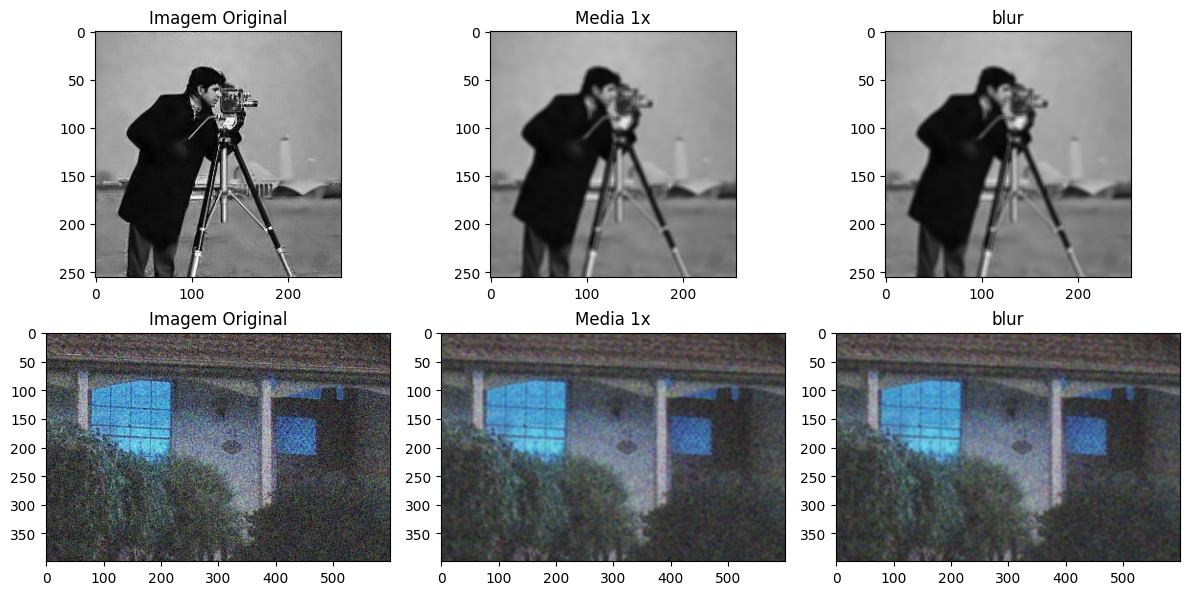

In [99]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(imgRuido)
plt.title('Imagem Original')

plt.subplot(2, 3, 2)
plt.imshow(dts1)
plt.title('Media 1x')

plt.subplot(2, 3, 3)
plt.imshow(blur1)
plt.title('blur')

plt.subplot(2, 3, 4)
plt.imshow(imgRuido2)
plt.title('Imagem Original')

plt.subplot(2, 3, 5)
plt.imshow(dts2)
plt.title('Media 1x')

plt.subplot(2, 3, 6)
plt.imshow(blur2)
plt.title('blur')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

# Erosão Dilatação

In [96]:
img = cv2.imread('./img/assinatura.png', cv2.COLOR_BGR2GRAY)

In [100]:
struct = np.ones((5,5), np.uint8)

In [101]:
img_erosao = cv2.erode(img, struct)

In [103]:
img_dilatacao = cv2.dilate(img, struct)

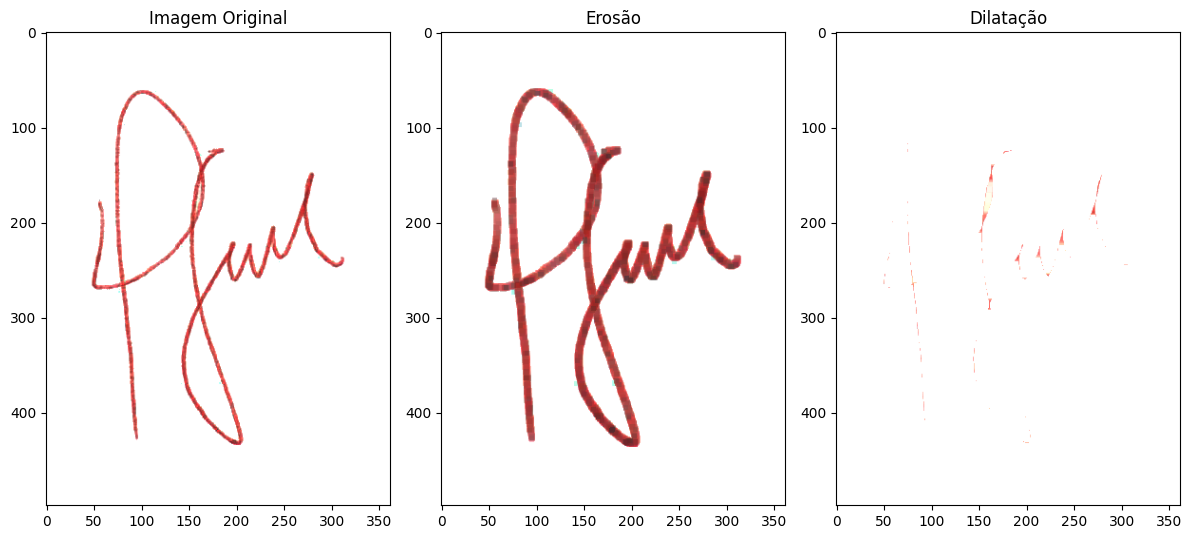

In [105]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(img_erosao)
plt.title('Erosão')

plt.subplot(1, 3, 3)
plt.imshow(img_dilatacao)
plt.title('Dilatação')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()